In [1]:
# http://justinblaber.org/acquiring-stereo-images-with-spinnaker-api-hardware-trigger/

In [2]:
import matplotlib.pyplot as plt
import PySpin

In [3]:
# Set camera serial numbers

camera_serials = [22181547]
serial_1 = str(camera_serials[0])


In [4]:
# Get system
system = PySpin.System.GetInstance()

In [5]:
# Get camera list
cam_list = system.GetCameras()
len(cam_list)

1

In [6]:
# Get cameras by serial
cam_1 = cam_list.GetBySerial(serial_1)

In [7]:
# Initialize cameras
cam_1.Init()

In [8]:
# Set up primary camera trigger
cam_1.LineSelector.SetValue(PySpin.LineSelector_Line2)
cam_1.V3_3Enable.SetValue(True)

In [9]:
# Set acquisition mode to acquire a single frame, this ensures acquired images are sync'd since camera 2 and 3 are setup to be triggered
cam_1.AcquisitionMode.SetValue(PySpin.AcquisitionMode_SingleFrame)

In [10]:
# Start acquisition; note that secondary cameras have to be started first so acquisition of primary camera triggers secondary cameras.
cam_1.BeginAcquisition()

In [11]:
# Acquire images
image_1 = cam_1.GetNextImage()

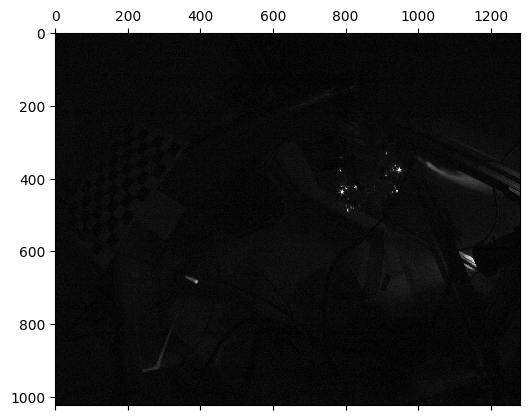

In [12]:
img_array = image_1.GetNDArray()
#img_chunk = image_1.GetChunkData()
tstamp = image_1.GetTimeStamp()
plt.matshow(img_array, cmap = plt.cm.Greys_r)

In [13]:
print(tstamp)

109010456400


In [14]:
# Release images
image_1.Release()

In [15]:
# end acquisition
cam_1.EndAcquisition()

- start acquisition
- for each camera, 